In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import scipy
from scipy import stats
from statannot import add_stat_annotation
from anndata import AnnData
import scanpy as sc

In [2]:
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
    plt.rcParams['text.usetex' ] = False
config_rcparams()

## 1. Differential pathways analysis Plot

In [38]:
## Differenatially expressed pathways between high and low immunoproteasome group
import glob, os
#os.chdir("/workspace/projects/immunoproteasome/03_output_v3/")
os.chdir("/workspace/projects/immunoproteasome/v1_copy_5/03_output/")
diff_exp_pathways_df=[]
for  i in glob.glob("high_low_immuno_prtoeasome_Diff_pathway_exp_*.csv"):
    diff_exp_pathways_df.append(i)
os.chdir("/workspace/projects/immunoproteasome/")

In [56]:
input_path1="/workspace/projects/immunoproteasome/v1_copy_5/03_output/"
#input_path1="/workspace/projects/immunoproteasome/03_output_v3/"
all_tumor_pathways_df=pd.DataFrame()
for i in range(33):
    diff_pathways_df=pd.read_csv(input_path1+diff_exp_pathways_df[i],index_col='Unnamed: 0')
    diff_pathways_df=diff_pathways_df[['logFC','adj.P.Val']]
    tumor_name=diff_exp_pathways_df[i].split('_')[7].split('.')[0]
    diff_pathways_df=diff_pathways_df.rename(columns={'logFC':'logFC_'+tumor_name,'adj.P.Val':'adj.P.Val_'+tumor_name})
    all_tumor_pathways_df=pd.concat([all_tumor_pathways_df, diff_pathways_df], axis=1)

GSVA_score_difference=all_tumor_pathways_df.T.iloc[::2]
GSVA_score_difference.index=GSVA_score_difference.index.str.split('_').str[1:2].str.join('.')
GSVA_score_difference.columns=GSVA_score_difference.columns.str.split('_').str[1:4].str.join('_')

In [58]:
all_tumor_pathways_df
gsva_p_values=all_tumor_pathways_df.T.iloc[1:66:2]
mask1=gsva_p_values<0.01
mask2=gsva_p_values>0.01
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

In [59]:
gsva_p_values

,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_COAGULATION,HALLMARK_COMPLEMENT,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,...,HALLMARK_HEME_METABOLISM,HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_G2M_CHECKPOINT,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_PANCREAS_BETA_CELLS,HALLMARK_UV_RESPONSE_DN,HALLMARK_MITOTIC_SPINDLE,HALLMARK_SPERMATOGENESIS,HALLMARK_HEDGEHOG_SIGNALING
adj.P.Val_LGG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adj.P.Val_UCEC,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
adj.P.Val_UVM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
adj.P.Val_THCA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adj.P.Val_PCPG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0
adj.P.Val_LUSC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adj.P.Val_OV,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adj.P.Val_GBM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adj.P.Val_KIRP,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
adj.P.Val_LIHC,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
mask3=(GSVA_score_difference>-0.2)&(GSVA_score_difference<0.2)
GSVA_score_difference[mask3]=np.nan

gsva_p_values=all_tumor_pathways_df.T.iloc[1:66:2]
mask1=gsva_p_values<0.01
mask2=gsva_p_values>0.01
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

GSVA_score_p_values_df=pd.DataFrame(GSVA_score_difference.values*gsva_p_values.values, columns=GSVA_score_difference.columns, index=GSVA_score_difference.index)

df_tmp=pd.DataFrame(GSVA_score_p_values_df.isnull().sum(axis = 0))
ref_pathways_list=list(df_tmp[df_tmp[0]<30].index)
GSVA_score_difference2=GSVA_score_p_values_df[ref_pathways_list]

In [53]:
gsva_p_values=all_tumor_pathways_df.T.iloc[1:66:2]
#mask1=gsva_p_values<0.05
#mask2=gsva_p_values>0.05
#gsva_p_values[mask1]=1
#gsva_p_values[mask2]=np.nan

In [55]:
gsva_p_values
all_tumor_pathways_df

,logFC_LGG,adj.P.Val_LGG,logFC_UCEC,adj.P.Val_UCEC,logFC_UVM,adj.P.Val_UVM,logFC_THCA,adj.P.Val_THCA,logFC_PCPG,adj.P.Val_PCPG,...,logFC_COAD,adj.P.Val_COAD,logFC_KICH,adj.P.Val_KICH,logFC_PAAD,adj.P.Val_PAAD,logFC_KIRC,adj.P.Val_KIRC,logFC_MESO,adj.P.Val_MESO
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.819331,NaN,0.776079,NaN,0.805498,NaN,0.812122,NaN,0.678111,NaN,...,0.693617,NaN,0.395625,NaN,0.677722,NaN,0.626664,NaN,0.861790,NaN
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.707947,NaN,0.653138,NaN,0.737395,NaN,0.780184,NaN,0.546004,NaN,...,0.576919,NaN,0.358682,NaN,0.446377,NaN,0.548810,NaN,0.681811,NaN
HALLMARK_IL6_JAK_STAT3_SIGNALING,0.468813,NaN,0.321861,NaN,0.612354,NaN,0.497044,NaN,0.259266,NaN,...,0.301689,NaN,NaN,NaN,NaN,NaN,0.285941,NaN,0.201570,NaN
HALLMARK_ALLOGRAFT_REJECTION,0.467221,NaN,0.510868,NaN,0.632680,NaN,0.730817,NaN,0.379335,NaN,...,0.379950,NaN,0.330887,NaN,NaN,NaN,0.535139,NaN,0.436854,NaN
HALLMARK_INFLAMMATORY_RESPONSE,0.308116,NaN,0.276235,NaN,0.497258,NaN,0.473085,NaN,0.236951,NaN,...,0.221612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223206,NaN
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.307096,NaN,NaN,NaN,0.244805,NaN,0.322717,NaN,0.202103,NaN,...,0.222757,NaN,0.279710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HALLMARK_COAGULATION,0.293917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HALLMARK_COMPLEMENT,0.274938,NaN,0.220000,NaN,0.393499,NaN,0.350361,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HALLMARK_IL2_STAT5_SIGNALING,0.255068,NaN,NaN,NaN,NaN,NaN,0.283691,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.250147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.281660,NaN,NaN,NaN,-0.336462,NaN


In [61]:
mask3=(GSVA_score_difference>-0.2)&(GSVA_score_difference<0.2)
GSVA_score_difference[mask3]=np.nan

gsva_p_values=all_tumor_pathways_df.T.iloc[1:66:2]
mask1=gsva_p_values<0.05
mask2=gsva_p_values>0.05
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

GSVA_score_p_values_df=pd.DataFrame(GSVA_score_difference.values*gsva_p_values.values, columns=GSVA_score_difference.columns, index=GSVA_score_difference.index)

df_tmp=pd.DataFrame(GSVA_score_p_values_df.isnull().sum(axis = 0))
ref_pathways_list=list(df_tmp[df_tmp[0]<30].index)
GSVA_score_difference2=GSVA_score_p_values_df[ref_pathways_list]

In [62]:
## Ordering the pathways based on how often they have appeared in differentially expressed dataframe
pathways_list=list(GSVA_score_difference2.columns)

### Frequency of upregualted pathways
freq_list=[]
for i in range (len(pathways_list)):
    freq_list.append(GSVA_score_difference2[GSVA_score_difference2[pathways_list[i]]>0.2].shape[0])  

df_tmp1=pd.DataFrame()
df_tmp1['freq_list']=freq_list
df_tmp1['pathways']=pathways_list
df_tmp2=df_tmp1.sort_values(by=['freq_list'],ascending=False)


### Frequency of downregualted pathways
freq_list=[]
for i in range (len(pathways_list)):
    freq_list.append(GSVA_score_difference2[GSVA_score_difference2[pathways_list[i]]<-0.2].shape[0])  

df_tmp1=pd.DataFrame()
df_tmp1['freq_list']=freq_list
df_tmp1['pathways']=pathways_list
df_tmp3=df_tmp1.sort_values(by=['freq_list'],ascending=False)

df_tmp4=pd.merge(df_tmp2,df_tmp3,on='pathways') ## combining up and down regualted pathways across tumor type

freq_list=list(df_tmp4['freq_list_x'].unique())
freq_list.reverse()
b_df=pd.DataFrame()
for i in range (len(freq_list)):
    a_df=df_tmp4[df_tmp4['freq_list_x']==freq_list[i]].sort_values(by=['freq_list_y'],ascending=True)
    b_df=pd.concat([a_df,b_df])

GSVA_score_difference2=GSVA_score_difference2.T
GSVA_score_difference2=GSVA_score_difference2.reindex(list(b_df['pathways']))

df_tmpp=GSVA_score_difference2[GSVA_score_difference2>0]
df_tmpp2=pd.DataFrame(df_tmpp.count())
new_index_list=list(df_tmpp2.sort_values([0],ascending=False).index)
GSVA_score_difference3=GSVA_score_difference2.T.reindex(new_index_list).T

KeyError: 'pathways'

In [49]:
fig=plt.figure(figsize=(7.5,6))
res=sns.heatmap(GSVA_score_difference3,linewidths=0.1, linecolor='black',center=0,square=True,rasterized=False,cmap="RdBu_r")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 7)
plt.title('Hallmarks enriched in high IP samples',fontsize=8)
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Differential_pathways_high_low_IP'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

NameError: name 'GSVA_score_difference3' is not defined

<Figure size 540x432 with 0 Axes>

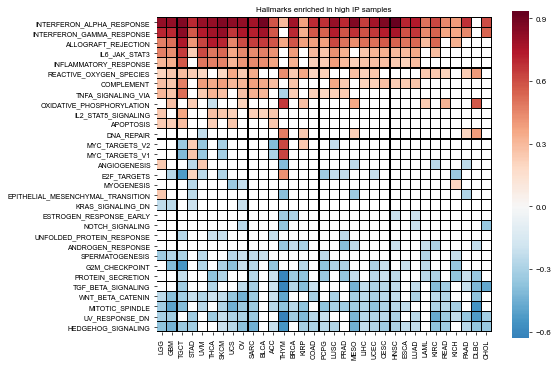

In [7]:
fig=plt.figure(figsize=(7.5,6))
res=sns.heatmap(GSVA_score_difference3,linewidths=0.1, linecolor='black',center=0,square=True,rasterized=False,cmap="RdBu_r")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 7)
plt.title('Hallmarks enriched in high IP samples',fontsize=8)
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Differential_pathways_high_low_IP'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

In [8]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/v1_copy_5/03_output/")
pathways_gsva_score_info=[]
for  i in glob.glob("GSVA_pathways_score*.tsv"):
    pathways_gsva_score_info.append(i)#.split('_')[7].split('.')[0])
os.chdir("/workspace/incubator/rahul_project/")

In [14]:
input_path2="/workspace/projects/immunoproteasome/v1_copy_5/03_output/"
a=[]
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/supple4.xlsx') as writer:  
    for i in range(33):
        pathways_gsva_score=pd.read_csv(input_path2+pathways_gsva_score_info[i],sep="\t")
        a.append(pathways_gsva_score_info[i].split('_')[3].split('.')[0])
        pathways_gsva_score.to_excel(writer, sheet_name=a[i])

In [22]:
pathways_gsva_score

,TCGA.04.1348,TCGA.04.1357,TCGA.04.1362,TCGA.04.1364,TCGA.04.1365,TCGA.04.1514,TCGA.04.1519,TCGA.09.0364,TCGA.09.0367,TCGA.09.0369,...,TCGA.61.2102,TCGA.61.2104,TCGA.61.2109,TCGA.61.2110,TCGA.61.2111,TCGA.61.2113,TCGA.OY.A56P,TCGA.OY.A56Q,TCGA.VG.A8LO,TCGA.WR.A838
HALLMARK_OXIDATIVE_PHOSPHORYLATION,0.393273,0.263998,0.022075,0.258112,0.071968,-0.421808,0.069173,-0.063821,0.639119,0.395709,...,-0.388007,-0.498592,-0.193872,0.120001,-0.431030,-0.545296,-0.515306,-0.308169,0.136827,-0.049106
HALLMARK_PEROXISOME,-0.026578,0.148377,-0.133659,0.193256,0.009475,-0.091628,0.220601,-0.024309,0.354691,0.136680,...,-0.262522,-0.034493,0.132630,0.145632,0.079090,-0.339412,-0.163617,0.197582,0.193449,-0.034039
HALLMARK_MYC_TARGETS_V2,0.597410,-0.342275,-0.415131,0.544346,0.323197,0.021783,0.370153,0.520074,0.139899,0.396439,...,0.228654,0.021533,0.269579,0.363246,-0.415603,-0.256953,0.265200,0.316742,0.310946,0.532797
HALLMARK_ESTROGEN_RESPONSE_LATE,-0.157415,-0.062494,0.242800,0.075897,-0.154640,0.164336,0.060139,0.038300,0.219884,-0.076986,...,-0.223663,0.009605,0.156805,0.180053,0.025189,-0.007640,-0.180625,-0.183555,0.111044,0.023073
HALLMARK_APICAL_SURFACE,-0.367924,0.074249,0.160303,-0.185030,-0.160746,0.193974,-0.081025,0.131600,-0.116069,-0.057611,...,0.081607,-0.065704,0.063096,0.013318,0.283487,0.192628,0.239863,0.119879,0.077778,-0.190521
HALLMARK_COMPLEMENT,0.055762,0.388932,0.002707,-0.408424,0.185775,-0.340157,-0.108990,-0.313043,-0.047109,-0.183809,...,-0.091351,0.088021,-0.035070,-0.078582,0.014064,0.186321,-0.274170,-0.262166,-0.181497,-0.314781
HALLMARK_XENOBIOTIC_METABOLISM,-0.112594,-0.025774,-0.106104,0.043185,-0.219783,-0.047630,0.128867,0.004428,0.106231,0.091611,...,0.023703,-0.046361,-0.211679,0.142216,0.090170,-0.067783,-0.144802,-0.011013,-0.028189,0.005271
HALLMARK_GLYCOLYSIS,-0.035933,-0.389495,-0.206467,0.058114,0.093364,-0.009409,-0.047764,0.017777,0.150112,0.183792,...,-0.068506,-0.108506,-0.044177,0.082736,-0.045417,0.019892,0.062773,-0.120659,-0.001799,0.060990
HALLMARK_ANGIOGENESIS,-0.498716,-0.261501,-0.272990,-0.502830,-0.094448,-0.178773,-0.247167,-0.186939,-0.243199,0.124443,...,0.350653,-0.128496,-0.331893,-0.187868,-0.094740,0.437549,0.098217,-0.273894,-0.175308,-0.420165
HALLMARK_BILE_ACID_METABOLISM,-0.252951,0.096766,-0.185854,0.073251,-0.210244,0.087577,0.164066,-0.050658,0.287543,0.093664,...,-0.255377,0.040467,-0.048705,0.076443,0.050241,-0.303065,0.149007,0.219097,-0.044864,-0.077474


In [28]:
input_path2="/workspace/projects/immunoproteasome/v1_copy_5/03_output/"
df_list={}
for i in range(33):
    pathways_gsva_score=pd.read_csv(input_path2+pathways_gsva_score_info[i],sep="\t")
    pathways_gsva_score1=pathways_gsva_score.T
    pathways_gsva_score1['Tissue type']=pathways_gsva_score_info[i].split("_")[3].split('.')[0]
    df_list[i]=pathways_gsva_score1

pathways_cell_df=pd.concat(df_list)
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/supple44.xlsx') as writer:  
    pathways_cell_df.to_excel(writer, sheet_name='Sheet_name_1')

In [30]:
pathways_cell_df
pathways_cell_df=pd.concat(df_list)
pathways_cell_df#[pathways_cell_df['Tissue type']=='OV']

HALLMARK_OXIDATIVE_PHOSPHORYLATION  HALLMARK_PEROXISOME  \
0  TCGA.18.3406                            0.351637             0.035370   
   TCGA.18.3407                           -0.035382            -0.023199   
   TCGA.18.3408                            0.213993             0.139322   
   TCGA.18.3410                           -0.044921            -0.066184   
   TCGA.18.3411                            0.460979             0.249631   
...                                             ...                  ...   
32 TCGA.61.2113                           -0.545296            -0.339412   
   TCGA.OY.A56P                           -0.515306            -0.163617   
   TCGA.OY.A56Q                           -0.308169             0.197582   
   TCGA.VG.A8LO                            0.136827             0.193449   
   TCGA.WR.A838                           -0.049106            -0.034039   

                 HALLMARK_MYC_TARGETS_V2  HALLMARK_ESTROGEN_RESPONSE_LATE  \
0  TCGA.18.3406                -0.435732                        -0.073908   
   TCGA.18.3407                -0.466011                         0.068125   
   TCGA.18.3408                -0.495705                        -0.113289   
   TCGA.18.3410                -0.072470                        -0.109573   
   TCGA.18.3411                 0.194166                        -0.062424   
...                                  ...                              ...   
32 TCGA.61.2113                -0.256953                        -0.007640   
   TCGA.OY.A56P                 0.265200                        -0.180625   
   TCGA.OY.A56Q                 0.316742                        -0.183555   
   TCGA.VG.A8LO                 0.310946                         0.111044   
   TCGA.WR.A838                 0.532797                         0.023073   

                 HALLMARK_APICAL_SURFACE  HALLMARK_COMPLEMENT  \
0  TCGA.18.3406                -0.263301             0.237168   
   TCGA.18.3407                -0.046232             0.221004   
   TCGA.18.3408                -0.080580             0.071767   
   TCGA.18.3410                 0.027685             0.105791   
   TCGA.18.3411                -0.338001             0.034519   
...                                  ...                  ...   
32 TCGA.61.2113                 0.192628             0.186321   
   TCGA.OY.A56P                 0.239863            -0.274170   
   TCGA.OY.A56Q                 0.119879            -0.262166   
   TCGA.VG.A8LO                 0.077778            -0.181497   
   TCGA.WR.A838                -0.190521            -0.314781   

                 HALLMARK_XENOBIOTIC_METABOLISM  HALLMARK_GLYCOLYSIS  \
0  TCGA.18.3406                       -0.059908             0.100086   
   TCGA.18.3407                        0.154054             0.102157   
   TCGA.18.3408                        0.071084             0.041016   
   TCGA.18.3410                        0.004669            -0.261264   
   TCGA.18.3411                        0.197408             0.231477   
...                                         ...                  ...   
32 TCGA.61.2113                       -0.067783             0.019892   
   TCGA.OY.A56P                       -0.144802             0.062773   
   TCGA.OY.A56Q                       -0.011013            -0.120659   
   TCGA.VG.A8LO                       -0.028189            -0.001799   
   TCGA.WR.A838                        0.005271             0.060990   

                 HALLMARK_ANGIOGENESIS  HALLMARK_BILE_ACID_METABOLISM  ...  \
0  TCGA.18.3406               0.108615                      -0.009277  ...   
   TCGA.18.3407               0.316132                       0.179625  ...   
   TCGA.18.3408              -0.105289                       0.094785  ...   
   TCGA.18.3410              -0.158144                       0.032955  ...   
   TCGA.18.3411              -0.150941                       0.069261  ...   
...                                ...                           

## Epithelial and mesenchymal plot analysis

In [13]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/03_output/")
tumor_tissues=[]
for  i in glob.glob("GSVA_epithelial_mesenchymal_score_*.tsv"):
    tumor_tissues.append(i)
os.chdir("/workspace/projects/immunoproteasome/")

In [14]:
input_path2="/workspace/projects/immunoproteasome/03_output/"
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"

mes_immuno_corr=[]
epi_immuno_corr=[]
mes_immuno_p_value=[]
epi_immuno_p_value=[]

mes_const_corr=[]
epi_const_corr=[]
mes_const_p_value=[]
epi_const_p_value=[]

tumor_tissue1=[]

for i in range(33):
    Epithelial_mesenchymal_score=pd.read_csv(input_path2+tumor_tissues[i],sep="\t")
    tumor_tissue1.append(tumor_tissues[i].split('_')[4].split('.')[0])
    
    gene_data_frame=pd.read_csv(input_path1+tumor_tissues[i].split('_')[4],index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=(gene_data_frame+0.01).T

    log_gene_data_frame=np.log2(gene_data_frame[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']])
    log_gene_data_frame['constitutive_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
     
    df_tmp_ep_mes_proteasomes=pd.merge(log_gene_data_frame,Epithelial_mesenchymal_score.T,left_index=True, right_index=True)
    df_tmp_ep_mes_proteasomes_1=df_tmp_ep_mes_proteasomes[['immuno_proteosome','constitutive_proteosome','Mesenchymal_genes','Epithelial_genes']]
    
    #mes_immuno.append(df_tmp_ep_mes_proteasomes_1.corr()['immuno_proteosome'][2])
    #epi_immuno.append(df_tmp_ep_mes_proteasomes_1.corr()['immuno_proteosome'][3])

    #mes_const.append(df_tmp_ep_mes_proteasomes_1.corr()['constitutive_proteosome'][2])
    #epi_const.append(df_tmp_ep_mes_proteasomes_1.corr()['constitutive_proteosome'][3])
    
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['constitutive_proteosome'], df_tmp_ep_mes_proteasomes_1['Mesenchymal_genes'])
    mes_const_corr.append(correlation)
    mes_const_p_value.append(p_value)
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['constitutive_proteosome'], df_tmp_ep_mes_proteasomes_1['Epithelial_genes'])
    epi_const_corr.append(correlation)
    epi_const_p_value.append(p_value) 
    
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['immuno_proteosome'], df_tmp_ep_mes_proteasomes_1['Mesenchymal_genes'])
    mes_immuno_corr.append(correlation)
    mes_immuno_p_value.append(p_value)
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['immuno_proteosome'], df_tmp_ep_mes_proteasomes_1['Epithelial_genes'])
    epi_immuno_corr.append(correlation)
    epi_immuno_p_value.append(p_value)
    
    #plt.plot(Epithelial_mesenchymal_score.loc['Mesenchymal_genes'],Epithelial_mesenchymal_score.loc['Epithelial_genes'],'o')
    #plt.xlabel('Mesenchymal_score')
    #plt.ylabel('Epithelial_score')
    #plt.title(tumor_tissues[i].split('_')[4].split('.')[0])
    #plt.show()

In [15]:
df_mes_epi_immuno=pd.DataFrame()
df_mes_epi_immuno['mes_immuno_corr']=mes_immuno_corr
df_mes_epi_immuno['mes_immuno_p_value']=mes_immuno_p_value
df_mes_epi_immuno['epi_immuno_corr']=epi_immuno_corr
df_mes_epi_immuno['epi_immuno_p_value']=epi_immuno_p_value
df_mes_epi_immuno.index=tumor_tissue1

df_mes_epi_const=pd.DataFrame()
df_mes_epi_const['mes_const_corr']=mes_const_corr
df_mes_epi_const['mes_const_p_value']=mes_const_p_value
df_mes_epi_const['epi_const_corr']=epi_const_corr
df_mes_epi_const['epi_const_p_value']=epi_const_p_value
df_mes_epi_const.index=tumor_tissue1

df_mes_epi_const_1=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']<0.05)&(df_mes_epi_const['epi_const_p_value']<0.05)]
df_mes_epi_immuno_1=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)]

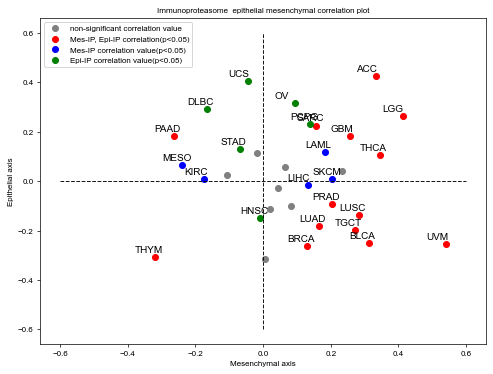

In [16]:
#tumor_tissue_list=list(df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)].index)

df_mes_epi_immuno_tmp=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']>0.05)&(df_mes_epi_immuno['epi_immuno_p_value']>0.05)]
df_mes_epi_immuno_tmp2=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)]
df_mes_epi_immuno_tmp3=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']>0.05)]
df_mes_epi_immuno_tmp4=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']>0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)]


#df_mes_epi_immuno_tmp=df_mes_epi_immuno[~df_mes_epi_immuno.index.isin(tumor_tissue_list)]

fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(df_mes_epi_const_1['mes_const_corr'],df_mes_epi_const_1['epi_const_corr'],'o',label="constituive proteassome")
ax.plot(df_mes_epi_immuno_tmp['mes_immuno_corr'],df_mes_epi_immuno_tmp['epi_immuno_corr'],'o',label="non-significant correlation value",color='grey')
ax.plot(df_mes_epi_immuno_tmp2['mes_immuno_corr'],df_mes_epi_immuno_tmp2['epi_immuno_corr'],'o',label="Mes-IP, Epi-IP correlation(p<0.05)",color='red')
ax.plot(df_mes_epi_immuno_tmp3['mes_immuno_corr'],df_mes_epi_immuno_tmp3['epi_immuno_corr'],'o',label="Mes-IP correlation value(p<0.05)",color='blue')
ax.plot(df_mes_epi_immuno_tmp4['mes_immuno_corr'],df_mes_epi_immuno_tmp4['epi_immuno_corr'],'o',label="Epi-IP correlation value(p<0.05)",color='green')

plt.xlabel('Mesenchymal axis')
plt.ylabel('Epithelial axis')
plt.title('Immunoproteasome  epithelial mesenchymal correlation plot')
ax.plot([-0.6, 0.6], [0, 0], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.plot([0, 0], [-0.6, 0.6], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.legend(loc="upper left")

x=df_mes_epi_immuno_tmp2['mes_immuno_corr']
y=df_mes_epi_immuno_tmp2['epi_immuno_corr']
labels=list(df_mes_epi_immuno_tmp2.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    #print(x_pos, y_pos,label)

x=df_mes_epi_immuno_tmp3['mes_immuno_corr']
y=df_mes_epi_immuno_tmp3['epi_immuno_corr']
labels=list(df_mes_epi_immuno_tmp3.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    #print(x_pos, y_pos,label)

x=df_mes_epi_immuno_tmp4['mes_immuno_corr']
y=df_mes_epi_immuno_tmp4['epi_immuno_corr']
labels=list(df_mes_epi_immuno_tmp4.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    #print(x_pos, y_pos,label)


plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Immuno_epith_mesench_corr_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

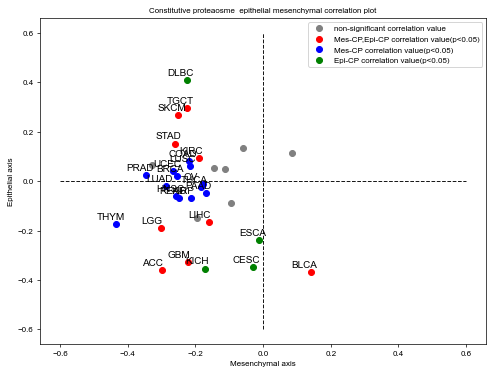

In [17]:
df_mes_epi_const_tmp=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']>0.05)&(df_mes_epi_const['epi_const_p_value']>0.05)]
df_mes_epi_const_tmp2=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']<0.05)&(df_mes_epi_const['epi_const_p_value']<0.05)]
df_mes_epi_const_tmp3=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']<0.05)&(df_mes_epi_const['epi_const_p_value']>0.05)]
df_mes_epi_const_tmp4=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']>0.05)&(df_mes_epi_const['epi_const_p_value']<0.05)]

fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(df_mes_epi_const_1['mes_const_corr'],df_mes_epi_const_1['epi_const_corr'],'o',label="constituive proteassome")
ax.plot(df_mes_epi_const_tmp['mes_const_corr'],df_mes_epi_const_tmp['epi_const_corr'],'o',label="non-significant correlation value",color='grey')
ax.plot(df_mes_epi_const_tmp2['mes_const_corr'],df_mes_epi_const_tmp2['epi_const_corr'],'o',label="Mes-CP,Epi-CP correlation value(p<0.05)",color='red')
ax.plot(df_mes_epi_const_tmp3['mes_const_corr'],df_mes_epi_const_tmp3['epi_const_corr'],'o',label="Mes-CP correlation value(p<0.05)",color='blue')
ax.plot(df_mes_epi_const_tmp4['mes_const_corr'],df_mes_epi_const_tmp4['epi_const_corr'],'o',label="Epi-CP correlation value(p<0.05)",color='green')

plt.xlabel('Mesenchymal axis')
plt.ylabel('Epithelial axis')
plt.title('Constitutive proteaosme  epithelial mesenchymal correlation plot')
ax.plot([-0.6, 0.6], [0, 0], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.plot([0, 0], [-0.6, 0.6], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.legend(loc="upper right")

x=df_mes_epi_const_tmp2['mes_const_corr']
y=df_mes_epi_const_tmp2['epi_const_corr']
labels=list(df_mes_epi_const_tmp2.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
x=df_mes_epi_const_tmp3['mes_const_corr']
y=df_mes_epi_const_tmp3['epi_const_corr']
labels=list(df_mes_epi_const_tmp3.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

x=df_mes_epi_const_tmp4['mes_const_corr']
y=df_mes_epi_const_tmp4['epi_const_corr']
labels=list(df_mes_epi_const_tmp4.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Const_epith_mesench_corr_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

## Supplemetray plot

In [31]:
## Differenatially expressed pathways between high and low immunoproteasome group
import glob, os
#os.chdir("/workspace/projects/immunoproteasome/03_output_v3/")
os.chdir("/workspace/projects/immunoproteasome/v1_copy_5/03_output/")
diff_exp_pathways_df=[]
for  i in glob.glob("high_low_const_prtoeasome_Diff_pathway_exp_*.csv"):
    diff_exp_pathways_df.append(i)
os.chdir("/workspace/projects/immunoproteasome/")

In [32]:
input_path1="/workspace/projects/immunoproteasome/v1_copy_5/03_output/"
#input_path1="/workspace/projects/immunoproteasome/03_output_v3/"
all_tumor_pathways_df=pd.DataFrame()
for i in range(33):
    diff_pathways_df=pd.read_csv(input_path1+diff_exp_pathways_df[i],index_col='Unnamed: 0')
    diff_pathways_df=diff_pathways_df[['logFC','adj.P.Val']]
    tumor_name=diff_exp_pathways_df[i].split('_')[7].split('.')[0]
    diff_pathways_df=diff_pathways_df.rename(columns={'logFC':'logFC_'+tumor_name,'adj.P.Val':'adj.P.Val_'+tumor_name})
    all_tumor_pathways_df=pd.concat([all_tumor_pathways_df, diff_pathways_df], axis=1)

GSVA_score_difference=all_tumor_pathways_df.T.iloc[::2]
GSVA_score_difference.index=GSVA_score_difference.index.str.split('_').str[1:2].str.join('.')
GSVA_score_difference.columns=GSVA_score_difference.columns.str.split('_').str[1:4].str.join('_')

In [33]:
mask3=(GSVA_score_difference>-0.2)&(GSVA_score_difference<0.2)
GSVA_score_difference[mask3]=np.nan

gsva_p_values=all_tumor_pathways_df.T.iloc[1:66:2]
mask1=gsva_p_values<0.05
mask2=gsva_p_values>0.05
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

GSVA_score_p_values_df=pd.DataFrame(GSVA_score_difference.values*gsva_p_values.values, columns=GSVA_score_difference.columns, index=GSVA_score_difference.index)

df_tmp=pd.DataFrame(GSVA_score_p_values_df.isnull().sum(axis = 0))
ref_pathways_list=list(df_tmp[df_tmp[0]<30].index)
GSVA_score_difference2=GSVA_score_p_values_df[ref_pathways_list]

In [34]:
mask3=(GSVA_score_difference>-0.2)&(GSVA_score_difference<0.2)
GSVA_score_difference[mask3]=np.nan

gsva_p_values=all_tumor_pathways_df.T.iloc[1:66:2]
mask1=gsva_p_values<0.01
mask2=gsva_p_values>0.01
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

GSVA_score_p_values_df=pd.DataFrame(GSVA_score_difference.values*gsva_p_values.values, columns=GSVA_score_difference.columns, index=GSVA_score_difference.index)

df_tmp=pd.DataFrame(GSVA_score_p_values_df.isnull().sum(axis = 0))
ref_pathways_list=list(df_tmp[df_tmp[0]<30].index)
GSVA_score_difference2=GSVA_score_p_values_df[ref_pathways_list]

In [35]:
## Ordering the pathways based on how often they have appeared in differentially expressed dataframe
pathways_list=list(GSVA_score_difference2.columns)

### Frequency of upregualted pathways
freq_list=[]
for i in range (len(pathways_list)):
    freq_list.append(GSVA_score_difference2[GSVA_score_difference2[pathways_list[i]]>0.2].shape[0])  

df_tmp1=pd.DataFrame()
df_tmp1['freq_list']=freq_list
df_tmp1['pathways']=pathways_list
df_tmp2=df_tmp1.sort_values(by=['freq_list'],ascending=False)


### Frequency of downregualted pathways
freq_list=[]
for i in range (len(pathways_list)):
    freq_list.append(GSVA_score_difference2[GSVA_score_difference2[pathways_list[i]]<-0.2].shape[0])  

df_tmp1=pd.DataFrame()
df_tmp1['freq_list']=freq_list
df_tmp1['pathways']=pathways_list
df_tmp3=df_tmp1.sort_values(by=['freq_list'],ascending=False)

df_tmp4=pd.merge(df_tmp2,df_tmp3,on='pathways') ## combining up and down regualted pathways across tumor type

freq_list=list(df_tmp4['freq_list_x'].unique())
freq_list.reverse()
b_df=pd.DataFrame()
for i in range (len(freq_list)):
    a_df=df_tmp4[df_tmp4['freq_list_x']==freq_list[i]].sort_values(by=['freq_list_y'],ascending=True)
    b_df=pd.concat([a_df,b_df])

GSVA_score_difference2=GSVA_score_difference2.T
GSVA_score_difference2=GSVA_score_difference2.reindex(list(b_df['pathways']))

KeyError: 'pathways'

In [36]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(GSVA_score_difference2,linewidths=0.5, linecolor='black',square=True,cmap="RdBu_r")
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Differential_pathways_between_CP'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x576 with 0 Axes>

In [37]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(GSVA_score_difference2,linewidths=0.5, linecolor='black',square=True,cmap="RdBu_r")
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Differential_pathways_between_CP'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x576 with 0 Axes>

###  Cancer cell lines treted with TNF alpha and TGF beta

### 1. TGFB1 effect on different cell lines

In [3]:
input_path3 = "/workspace/projects/immunoproteasome/EMT_data/"
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])

temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_A549_TGFB1=temp3

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])

temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_OVCA420_TGFB1=temp3



gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['ratio_immuno_constitutive']=temp3['immunopeoteasome_avaerage']/temp3['constitutive_proteasome_avaerage']
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_DU145_TGFB1=temp3



gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_MCF7_TGFB1=temp3

 ### 2. TNF effect on cell lines

In [4]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_A549_TNF=temp3

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_DU145_TNF=temp3

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_MCF7_TNF=temp3


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_OVCA420_TNF=temp3


In [5]:
temp3['immunopeoteasome_avaerage'][0]
temp3_MCF7_TNF

,PSMB8,PSMB9,PSMB10,PSMB5,PSMB6,PSMB7,immunopeoteasome_avaerage,constitutive_proteasome_avaerage,immuno_proteasome_change_ratio,const_proteasome_change_ratio
Time,,,,,,,,,,
0d,0.000003,0.000004,0.000004,0.000690,0.000356,0.000328,0.000003,0.000458,1.000000,1.000000
8h,0.000008,0.000037,0.000007,0.000761,0.000409,0.000348,0.000017,0.000506,5.011139,1.104041
1d,0.000008,0.000034,0.000008,0.000834,0.000457,0.000417,0.000016,0.000569,4.745344,1.242694
3d,0.000013,0.000041,0.000007,0.000776,0.000407,0.000370,0.000020,0.000518,5.870033,1.130537
7d,0.000020,0.000044,0.000008,0.000697,0.000383,0.000315,0.000024,0.000465,6.892760,1.014643
8h_rm,0.000030,0.000048,0.000006,0.000617,0.000376,0.000300,0.000028,0.000431,8.047916,0.940396
1d_rm,0.000007,0.000021,0.000007,0.000832,0.000426,0.000376,0.000012,0.000545,3.404643,1.188873
3d_rm,0.000006,0.000011,0.000007,0.000960,0.000535,0.000507,0.000008,0.000668,2.292484,1.456993


In [6]:
temp3_MCF7_TGFB1

,PSMB8,PSMB9,PSMB10,PSMB5,PSMB6,PSMB7,immunopeoteasome_avaerage,constitutive_proteasome_avaerage,immuno_proteasome_change_ratio,const_proteasome_change_ratio
Time,,,,,,,,,,
0d,0.000004,0.000006,0.000005,0.000714,0.000387,0.000322,0.000005,0.000474,1.000000,1.000000
8h,0.000002,0.000006,0.000007,0.000698,0.000387,0.000333,0.000005,0.000473,1.020165,0.997152
1d,0.000003,0.000005,0.000007,0.000594,0.000322,0.000286,0.000005,0.000401,0.942966,0.844857
3d,0.000005,0.000006,0.000005,0.000750,0.000383,0.000373,0.000005,0.000502,1.074532,1.058573
7d,0.000005,0.000008,0.000010,0.000603,0.000258,0.000234,0.000008,0.000365,1.500211,0.770059
8h_rm,0.000003,0.000007,0.000006,0.000619,0.000326,0.000329,0.000005,0.000425,1.082604,0.895683
1d_rm,0.000005,0.000011,0.000005,0.000757,0.000391,0.000357,0.000007,0.000502,1.413449,1.058872
3d_rm,0.000005,0.000010,0.000010,0.001021,0.000480,0.000497,0.000008,0.000666,1.648585,1.404344


In [7]:
gene_data_frame4
gene_data_frame4ann.sort_values(by='percent.mito')
#temp11=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
#gene_data_frame4ann
#temp11[temp11['Time']=='3d_rm']

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,Sample,CellLine,Treatment,Time,Doublet,S.Score,...,Phase,Mix,SCT_snn_res.0.8,SCT_snn_res.0.1,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.05,Cluster,RNA_snn_res.0.5,Pseudotime
Mix2_CAAGATCAGTTCGCAT,Mix2,13836,2774,0.000578,OVCA420_TNF_7d,OVCA420,TNF,7d,Singlet,-0.363511,...,G1,Mix2,8,3,3,1,3,3,1,0.789736
Mix4a_CAGTCCTCAACTTGAC,Mix4a,12331,3057,0.000729,OVCA420_TNF_7d,OVCA420,TNF,7d,Singlet,-0.251979,...,G1,Mix4a,8,3,3,0,3,3,0,0.713517
Mix2_TTAACTCGTCCAGTTA,Mix2,7819,2462,0.002937,OVCA420_TNF_8h_rm,OVCA420,TNF,8h_rm,Singlet,0.014056,...,G2M,Mix2,8,3,3,0,3,3,0,0.615139
Mix4b_ATAAGAGTCCCACTTG,Mix4b,15141,3300,0.010690,OVCA420_TNF_7d,OVCA420,TNF,7d,Singlet,-0.498738,...,G1,Mix4b,12,3,3,3,3,3,3,0.632587
Mix3a_TAGTTGGTCACCTCGT,Mix3a,3556,1638,0.014334,OVCA420_TNF_0d,OVCA420,TNF,0d,Singlet,0.361159,...,S,Mix3a,12,3,3,2,3,3,2,0.438521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mix4a_TGAGGGACATAGTAAG,Mix4a,19044,3903,0.104819,OVCA420_TNF_8h,OVCA420,TNF,8h,Singlet,0.396127,...,S,Mix4a,8,3,3,1,3,3,1,0.599725
Mix4a_GGCTCGACAAGGCTCC,Mix4a,18294,3957,0.105835,OVCA420_TNF_1d,OVCA420,TNF,1d,Singlet,-0.339271,...,G1,Mix4a,8,3,3,1,3,3,1,0.599743
Mix4a_ACCAGTATCCAAACTG,Mix4a,21869,4047,0.106231,OVCA420_TNF_0d,OVCA420,TNF,0d,Singlet,0.158032,...,S,Mix4a,8,3,3,1,3,3,1,0.357160
Mix4a_CATTCGCTCGGGAGTA,Mix4a,4231,1711,0.106840,OVCA420_TNF_3d,OVCA420,TNF,3d,Singlet,-0.021285,...,G2M,Mix4a,8,3,3,1,3,3,1,0.674825


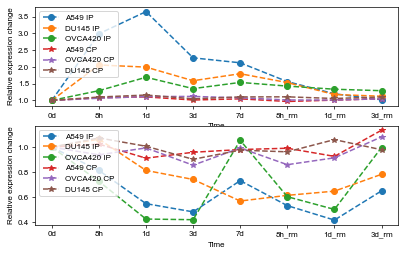

In [8]:
temp3_A549_TNF_1=temp3_A549_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_A549_TNF_1.columns=['TNF_A549_immuno','TNF_A549_const']
temp3_OVCA420_TNF_1=temp3_OVCA420_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_OVCA420_TNF_1.columns=['TNF_OVCA420_immuno','TNF_OVCA420_const']
temp3_MCF7_TNF_1=temp3_MCF7_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_MCF7_TNF_1.columns=['TNF_MCF7_immuno','TNF_MCF7_const']
temp3_DU145_TNF_1=temp3_DU145_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_DU145_TNF_1.columns=['TNF_DU145_immuno','TNF_DU145_const']

temp3_A549_TGFB1_1=temp3_A549_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_A549_TGFB1_1.columns=['TGFB1_A549_immuno','TGFB1_A549_const']
temp3_OVCA420_TGFB1_1=temp3_OVCA420_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_OVCA420_TGFB1_1.columns=['TGFB1_OVCA420_immuno','TGFB1_OVCA420_const']
temp3_MCF7_TGFB1_1=temp3_MCF7_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_MCF7_TGFB1_1.columns=['TGFB1_MCF7_immuno','TGFB1_MCF7_const']
temp3_DU145_TGFB1_1=temp3_DU145_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_DU145_TGFB1_1.columns=['TGFB1_DU145_immuno','TGFB1_DU145_const']

final_df=pd.concat([temp3_A549_TNF_1,temp3_OVCA420_TNF_1,temp3_MCF7_TNF_1,temp3_DU145_TNF_1,temp3_A549_TGFB1_1,temp3_OVCA420_TGFB1_1,temp3_MCF7_TGFB1_1,temp3_DU145_TGFB1_1],axis=1)

fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TNF_A549_immuno'],'--o')
axes[0].plot(final_df['TNF_DU145_immuno'],'--o')
axes[0].plot(final_df['TNF_OVCA420_immuno'],'--o')
axes[0].plot(final_df['TNF_A549_const'],'--*')
axes[0].plot(final_df['TNF_OVCA420_const'],'--*')
axes[0].plot(final_df['TNF_DU145_const'],'--*')
axes[0].legend(['A549 IP','DU145 IP','OVCA420 IP','A549 CP','OVCA420 CP','DU145 CP'],loc='upper left')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Relative expression change')#plt.savefig('/workspace/projects/immunoproteasome/plots/'+'TNF_perterberd_CP_IP_expression'+'.svg',bbox_inches = "tight",dpi=500)

axes[1].plot(final_df['TGFB1_A549_immuno'],'--o')
axes[1].plot(final_df['TGFB1_DU145_immuno'],'--o')
axes[1].plot(final_df['TGFB1_OVCA420_immuno'],'--o')
axes[1].plot(final_df['TGFB1_A549_const'],'--*') 
axes[1].plot(final_df['TGFB1_OVCA420_const'],'--*')
axes[1].plot(final_df['TGFB1_DU145_const'],'--*')
axes[1].legend(['A549 IP','DU145 IP','OVCA420 IP','A549 CP','OVCA420 CP','DU145 CP'],loc='upper left')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Relative expression change')
plt.savefig('/workspace/projects/immunoproteasome/plots/Combined_IP_CP_v2.svg',bbox_inches = "tight",dpi=500)
plt.show()

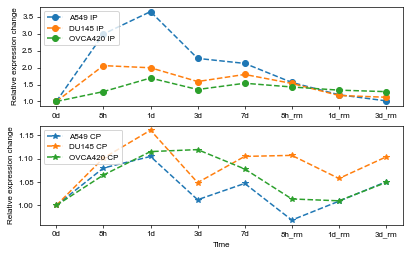

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TNF_A549_immuno'],'--o')
axes[0].plot(final_df['TNF_DU145_immuno'],'--o')
axes[0].plot(final_df['TNF_OVCA420_immuno'],'--o')

axes[1].plot(final_df['TNF_A549_const'],'--*')
axes[1].plot(final_df['TNF_DU145_const'],'--*')
axes[1].plot(final_df['TNF_OVCA420_const'],'--*')
axes[1].set_xlabel('Time')

axes[0].set_ylabel('Relative expression change')
axes[1].set_ylabel('Relative expression change')

axes[0].legend(['A549 IP','DU145 IP','OVCA420 IP'],loc='upper left')
axes[1].legend(['A549 CP','DU145 CP','OVCA420 CP'],loc='upper left')
plt.savefig('/workspace/projects/immunoproteasome/plots/Cell_lines_TNF_treatement_IP_CP.svg',bbox_inches = "tight",dpi=500)
plt.show()

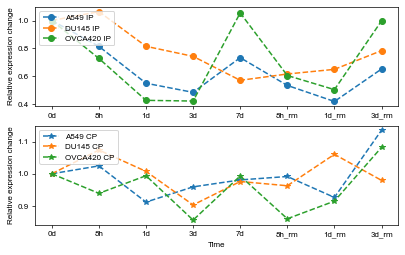

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TGFB1_A549_immuno'],'--o')
axes[0].plot(final_df['TGFB1_DU145_immuno'],'--o')
axes[0].plot(final_df['TGFB1_OVCA420_immuno'],'--o')

axes[1].plot(final_df['TGFB1_A549_const'],'--*') 
axes[1].plot(final_df['TGFB1_DU145_const'],'--*')
axes[1].plot(final_df['TGFB1_OVCA420_const'],'--*')

axes[1].set_xlabel('Time')
axes[0].set_ylabel('Relative expression change')
axes[1].set_ylabel('Relative expression change')
axes[0].legend(['A549 IP','DU145 IP','OVCA420 IP'],loc='upper left')
axes[1].legend(['A549 CP','DU145 CP','OVCA420 CP'],loc='upper left')
plt.savefig('/workspace/projects/immunoproteasome/plots/Cell_lines_TGFB_treatement_IP_CP.svg',bbox_inches = "tight",dpi=500)
plt.show()

## Supplementary figure Cell line MCF7

In [32]:
final_df

,TNF_A549_immuno,TNF_A549_const,TNF_OVCA420_immuno,TNF_OVCA420_const,TNF_MCF7_immuno,TNF_MCF7_const,TNF_DU145_immuno,TNF_DU145_const,TGFB1_A549_immuno,TGFB1_A549_const,TGFB1_OVCA420_immuno,TGFB1_OVCA420_const,TGFB1_MCF7_immuno,TGFB1_MCF7_const,TGFB1_DU145_immuno,TGFB1_DU145_const
Time,,,,,,,,,,,,,,,,
0d,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8h,2.991223,1.079954,1.291106,1.064945,5.011139,1.104041,2.058157,1.101203,0.814158,1.024476,0.727201,0.939210,1.020165,0.997152,1.063857,1.073732
1d,3.652071,1.104651,1.691820,1.115086,4.745344,1.242694,1.994808,1.160781,0.549175,0.912049,0.426249,0.993891,0.942966,0.844857,0.814504,1.007378
3d,2.271422,1.012119,1.352825,1.119316,5.870033,1.130537,1.588733,1.048771,0.483576,0.959358,0.421107,0.856161,1.074532,1.058573,0.742411,0.903214
7d,2.123587,1.046945,1.537556,1.077893,6.892760,1.014643,1.797250,1.104762,0.732954,0.980912,1.054589,0.993286,1.500211,0.770059,0.570177,0.975957
8h_rm,1.561863,0.968603,1.427805,1.013765,8.047916,0.940396,1.532574,1.106990,0.533409,0.991518,0.604743,0.860249,1.082604,0.895683,0.615535,0.962806
1d_rm,1.198049,1.008944,1.334312,1.009791,3.404643,1.188873,1.177024,1.057563,0.418123,0.926529,0.503233,0.914986,1.413449,1.058872,0.648985,1.060362
3d_rm,1.018505,1.050412,1.290114,1.049020,2.292484,1.456993,1.124381,1.103639,0.651308,1.135274,0.996939,1.082098,1.648585,1.404344,0.783430,0.979573


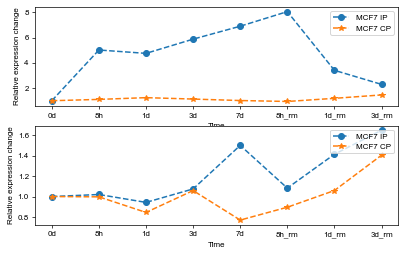

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TNF_MCF7_immuno'],'--o')
axes[0].plot(final_df['TNF_MCF7_const'],'--*')
axes[0].legend(['MCF7 IP','MCF7 CP'],loc='upper right')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Relative expression change')
axes[1].plot(final_df['TGFB1_MCF7_immuno'],'--o')
axes[1].plot(final_df['TGFB1_MCF7_const'],'--*')
axes[1].legend(['MCF7 IP','MCF7 CP'],loc='upper right')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Relative expression change')
plt.savefig('/workspace/projects/immunoproteasome/plots/Combined_IP_CP_MCF7.svg',bbox_inches = "tight",dpi=500)
plt.show()

### New figure

In [96]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(gene_data_frame4.T,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/0.259932
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/9.224415
temp3_A549_TNF=temp3

### TNF treatment

In [126]:
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
newdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


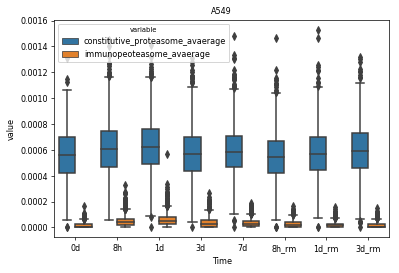

In [132]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)

gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


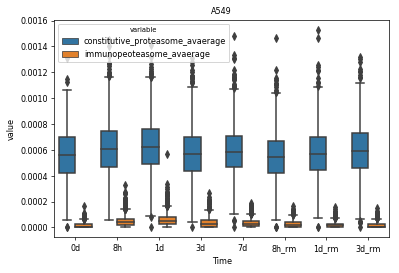

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


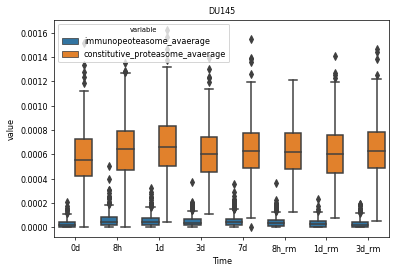

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


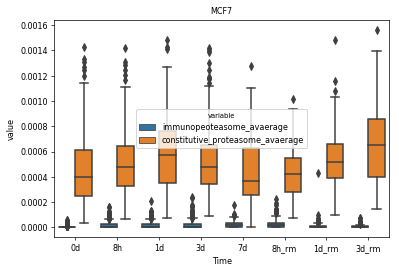

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


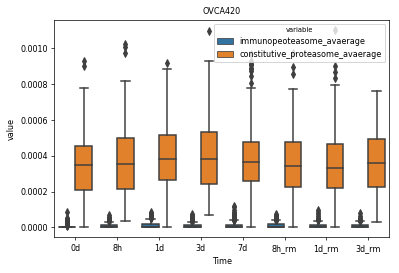

In [133]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)

gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('DU145')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('MCF7')
plt.show()

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('OVCA420')
plt.show()

### TGF beta treatment

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


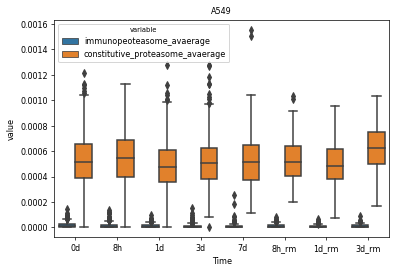

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


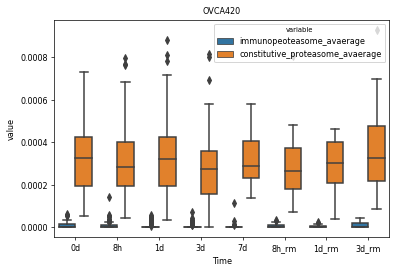

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


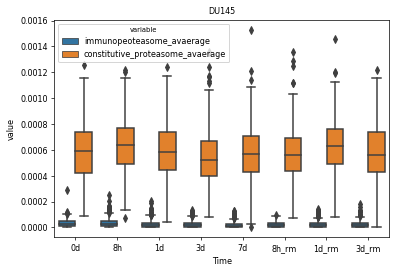

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


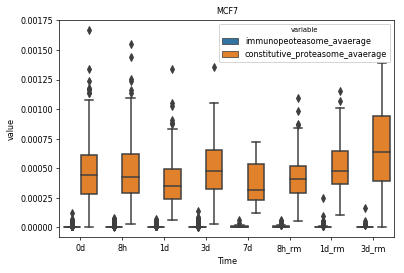

In [134]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('OVCA420')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('DU145')
plt.show()

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage','constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]]*2)['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('MCF7')
plt.show()

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


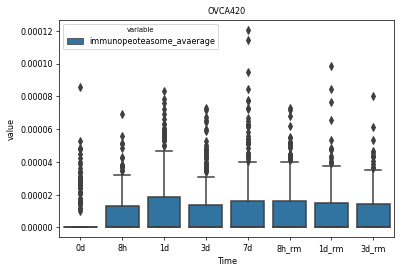

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


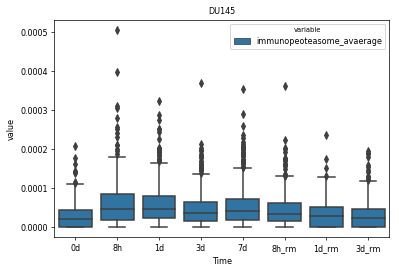

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


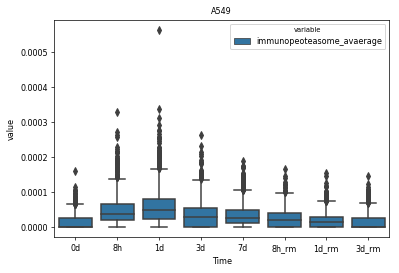

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


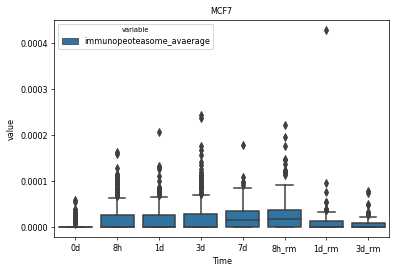

In [135]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('OVCA420')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('DU145')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('MCF7')
plt.show()

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


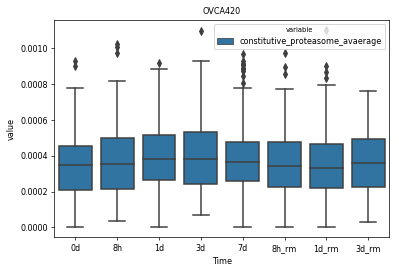

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


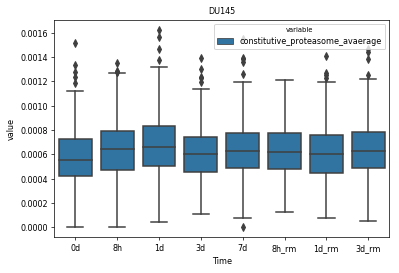

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


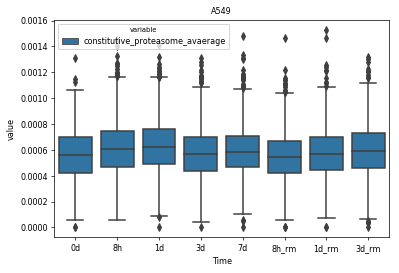

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


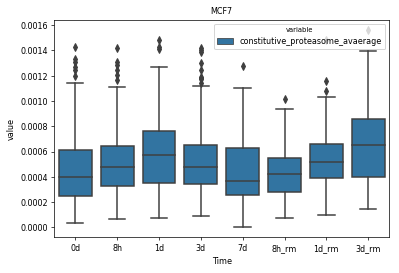

In [136]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('OVCA420')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('DU145')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('MCF7')
plt.show()

### treated with TGFB1 IP

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


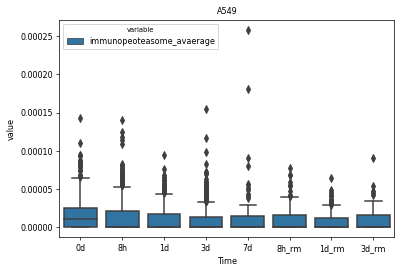

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


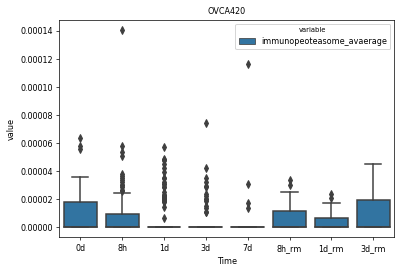

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


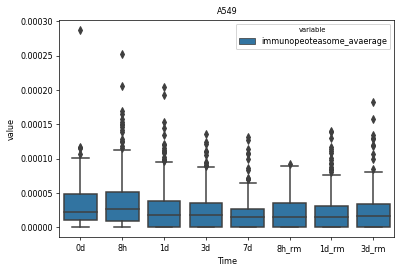

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


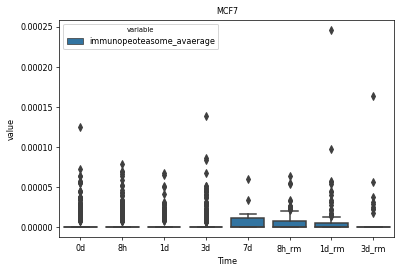

In [137]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('OVCA420')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','immunopeoteasome_avaerage']]
df_melt=pd.melt(temp1_1[['immunopeoteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('MCF7')
plt.show()

### treated with TGFB1 CP

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


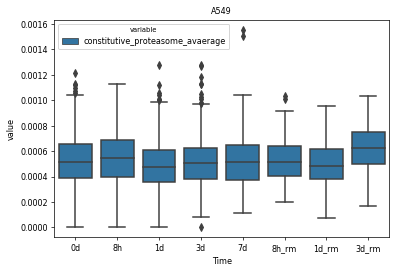

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


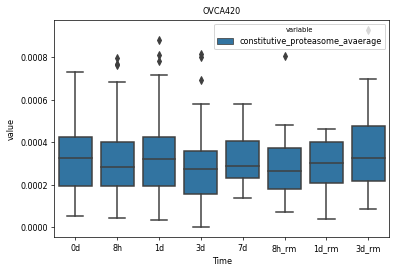

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


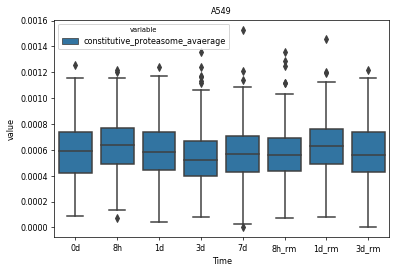

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


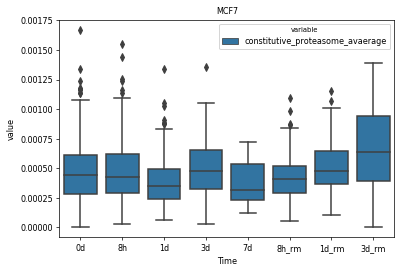

In [138]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('OVCA420')
plt.show()


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('A549')
plt.show()

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

tempp1=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']]
tempp1['immunopeoteasome_avaerage']=(1/3)*(tempp1['PSMB8']+tempp1['PSMB9']+tempp1['PSMB10'])
tempp1['constitutive_proteasome_avaerage']=(1/3)*(tempp1['PSMB5']+tempp1['PSMB6']+tempp1['PSMB7'])

temp1_1=tempp1[['Time','constitutive_proteasome_avaerage']]
df_melt=pd.melt(temp1_1[['constitutive_proteasome_avaerage']])
df_melt['Time']=list(pd.concat([temp1_1[['Time']]])['Time'])

df_mapping = pd.DataFrame({
    'Time': ['0d','8h','1d','3d','7d','8h_rm','1d_rm','3d_rm'],})
sort_mapping = df_mapping.reset_index().set_index('Time')

df_melt['Time_num'] = df_melt['Time'].map(sort_mapping['index'])
df_melt1=df_melt.sort_values('Time_num')

sns.boxplot(x="Time",y="value",hue="variable",data=df_melt1)
plt.title('MCF7')
plt.show()